__Name:__ Amrita Veshin <br>
__Register No.:__ 22122104

----------------------------------------------------------------------
# <center> NLP CAC-1: SARCASM DETECTION DATASET EDA
----------------------------------------------------------------------

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm') #storing the english dictionary as an object named 'nlp'

In [ ]:
with open('sarcasm1.txt', 'r', encoding='utf-8') as file:
    data = file.read()
rows = data.split('\n')


In [ ]:
# Creating a list of lists, where each sublist represents a row with columns
data_list = [row.split('\t') for row in rows]


In [ ]:
# Initializing a list to hold the tokens
tokens = []

# Iterating through your data list and create SpaCy tokens
for row in data_list:
    tokens.extend(row)

# Creating a SpaCy Doc from the tokens
doc = nlp(" ".join(tokens))

# Now, 'doc' is the SpaCy NLP document containing the tab-separated data



## Tokenization and Validation of Relevant Tokens

In [ ]:
# Initializing lists to store relevant tokens
relevant_tokens = []

In [ ]:
# We define a function to filter out irrelevant tokens. We check if the token consists of only alphabets(letters) and not numerals or symbols using is_alpha.
# Then we check whether it is not a stop word
stop_words=set(spacy.lang.en.stop_words.STOP_WORDS)

def is_token_relevant(token):
    if token.is_alpha and token.text.lower() not in stop_words:
      return token

In [ ]:
# Iterating through tokens in the document and filtering relevant tokens (by appending into the relevant_tokens list):
for token in doc:
    if is_token_relevant(token):
        relevant_tokens.append([token.text,token.pos_, token.dep_, token.lemma_])

In [ ]:
# Printing the relevant tokens along with their POS (Part of Speech), DEP, and lemma
from tabulate import tabulate

headers = ["Text", "POS", "DEP", "LEMMA"]
table = tabulate(relevant_tokens, headers, tablefmt="grid")
print(table)

+----------------------------------+-------+-----------+----------------------------------+
| Text                             | POS   | DEP       | LEMMA                            |
+==================================+=======+===========+==================================+
| Tweet                            | PROPN | npadvmod  | Tweet                            |
+----------------------------------+-------+-----------+----------------------------------+
| love                             | VERB  | ROOT      | love                             |
+----------------------------------+-------+-----------+----------------------------------+
| finding                          | VERB  | xcomp     | find                             |
+----------------------------------+-------+-----------+----------------------------------+
| true                             | ADJ   | amod      | true                             |
+----------------------------------+-------+-----------+------------------------

## Named Entity Recognition

In [ ]:
#Printing Entities, their Labels and Description
entities=[]

for ent in doc.ents:
  for char in ent.text:
    if char.isalnum():
      entities.append([ent.text, ent.label_, spacy.explain(ent.label_)])

ent_headers=["Entity", "Entity Label", "Label Description"]
table2 = tabulate(entities, ent_headers, tablefmt="grid")
print(table2)

+-----------------------------------------------------------+----------------+------------------------------------------------------+
| Entity                                                    | Entity Label   | Label Description                                    |
+===========================================================+================+======================================================+
| Kanye                                                     | PERSON         | People, including fictional                          |
+-----------------------------------------------------------+----------------+------------------------------------------------------+
| Kanye                                                     | PERSON         | People, including fictional                          |
+-----------------------------------------------------------+----------------+------------------------------------------------------+
| Kanye                                                     | 

## Getting the Top 7 Frequently Occurring Entities

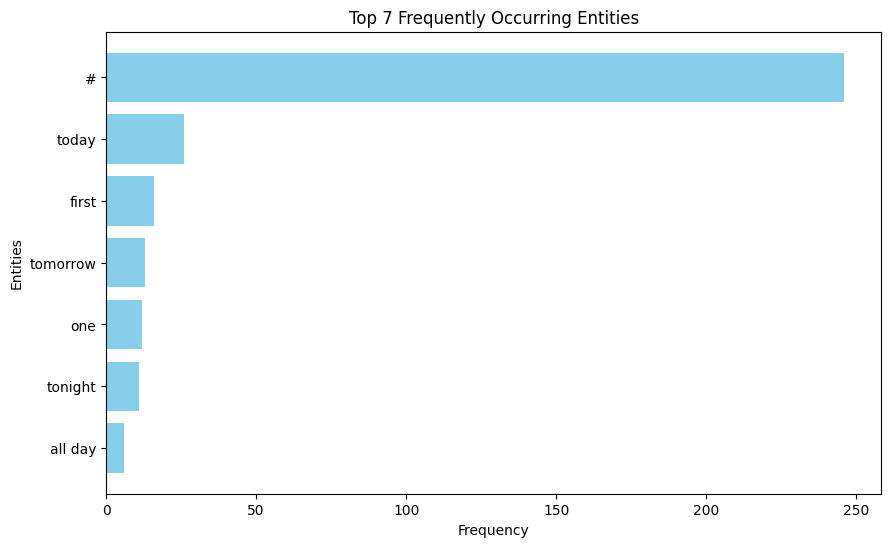

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Count entity frequencies (entity.text)
entity_freq = Counter([ent.text for ent in doc.ents])

# Get the top 7 entities
top_entities = entity_freq.most_common(7)

# Extract entity names and frequencies
entities1, frequencies = zip(*top_entities)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(entities1, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Entities')
plt.title('Top 7 Frequently Occurring Entities')
plt.gca().invert_yaxis()
plt.show()



## Getting the Top 7 Frequently Occurring Tokens

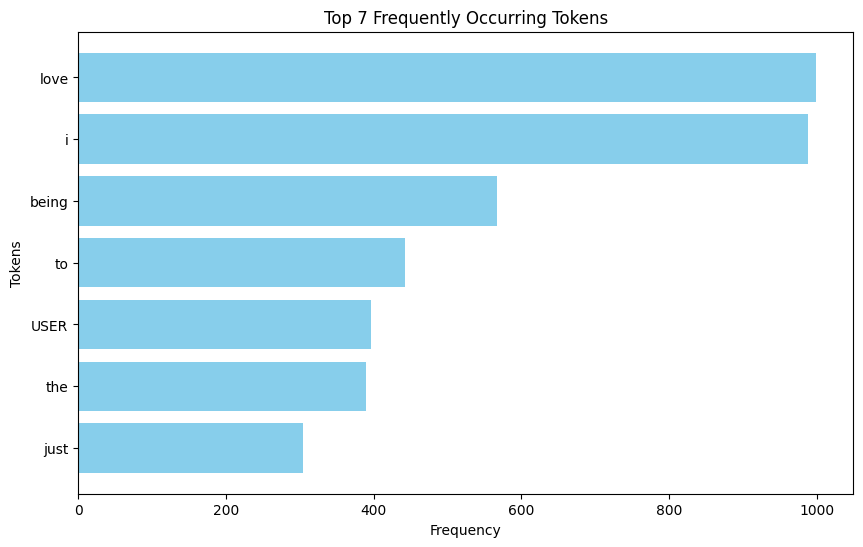

In [ ]:
# Tokenize the text and count token frequencies
token_freq = Counter([token.text for token in doc if token.is_alpha and not token.is_punct])

# Get the top 7 tokens
top_tokens = token_freq.most_common(7)

# Extract token names and frequencies
tokens, frequencies = zip(*top_tokens)

# Create a bar plot for token frequencies
plt.figure(figsize=(10, 6))
plt.barh(tokens, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Tokens')
plt.title('Top 7 Frequently Occurring Tokens')
plt.gca().invert_yaxis()
plt.show()